In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sartajbhuvaji/brain-tumor-classification-mri")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import os

path = os.listdir('/root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2')
classes = {'no_tumor':0, 'pituitary_tumor':1,'meningioma_tumor':2,'glioma_tumor':3}

In [ ]:
import cv2
import os

X = []
Y = []

# Assuming the dataset structure is: /root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2/{Training,Testing}/{class_name}/{images}
# Modify 'dataset_split' to either 'Training' or 'Testing' depending on which you want to use
dataset_split = 'Training'

for cls in classes:
    # Updated path construction to include the dataset split (Training/Testing)
    pth = os.path.join('/root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2', dataset_split, cls)

    # Check if the directory exists to avoid FileNotFoundError
    if os.path.isdir(pth):
        for j in os.listdir(pth):
            img = cv2.imread(os.path.join(pth, j), 0)  # Using os.

In [ ]:
import cv2
import os
import numpy as np # Import numpy

X = []
Y = []

# Assuming the dataset structure is: /root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2/{Training,Testing}/{class_name}/{images}
# Modify 'dataset_split' to either 'Training' or 'Testing' depending on which you want to use
dataset_split = 'Training'

for cls in classes:
    # Updated path construction to include the dataset split (Training/Testing)
    pth = os.path.join('/root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2', dataset_split, cls)

    # Check if the directory exists to avoid FileNotFoundError
    if os.path.isdir(pth):
        for j in os.listdir(pth):
            img_path = os.path.join(pth, j)  # Construct the full image path

            # Check if the current item is a file to avoid processing directories
            if os.path.isfile(img_path):
                img = cv2.imread(img_path, 0)  # Using os.path.join for safer path construction

                # Check if the image was loaded successfully
                if img is not None:
                    img = cv2.resize(img, (200,200))
                    X.append(img)
                    Y.append(classes[cls])
                else:
                    print(f"Warning: Could not load image: {img_path}")
    else:
        print(f"Warning: Directory not found: {pth}")

X = np.array(X)
Y = np.array(Y)

# Check if X is empty before reshaping
if X.size > 0:
    X_updated = X.reshape(len(X), -1)
else:
    print("Error: X is empty. Could not reshape.")

In [ ]:
np.unique(Y)

array([0, 1, 2, 3])

In [ ]:
pd.Series(Y).value_counts()

,count
1,827
3,826
2,822
0,395


In [ ]:
X.shape, X_updated.shape

((2870, 200, 200), (2870, 40000))

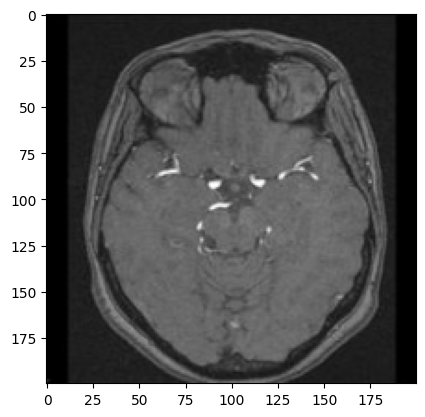

In [ ]:
plt.imshow(X[0], cmap='gray')

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(2870, 40000)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [ ]:
xtrain.shape, xtest.shape

((2296, 40000), (574, 40000))

**Feature Scaling**

In [ ]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [ ]:
from sklearn.decomposition import PCA
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(2296, 40000) (574, 40000)


In [ ]:
print(pca_train.shape, pca_test.shape)
print(pca.n_components_)

(2296, 40000) (574, 40000)
1302


In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Model Training**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [ ]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

**Evaluation**

In [ ]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.7735191637630662


In [ ]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9355400696864111
Testing Score: 0.8083623693379791


In [ ]:
pred1 = lg.predict(xtest)

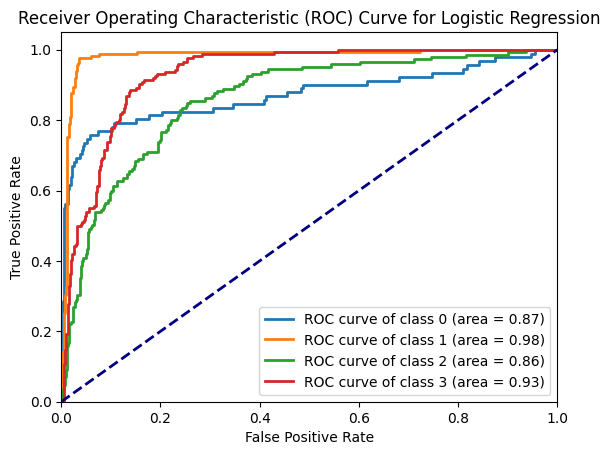

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming ytest contains your actual test labels and lg is your trained Logistic Regression model
y_true = label_binarize(ytest, classes=np.unique(ytest))  # Binarize the labels
y_scores = lg.predict_proba(xtest)  # Get predicted probabilities for each class
n_classes = y_true.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

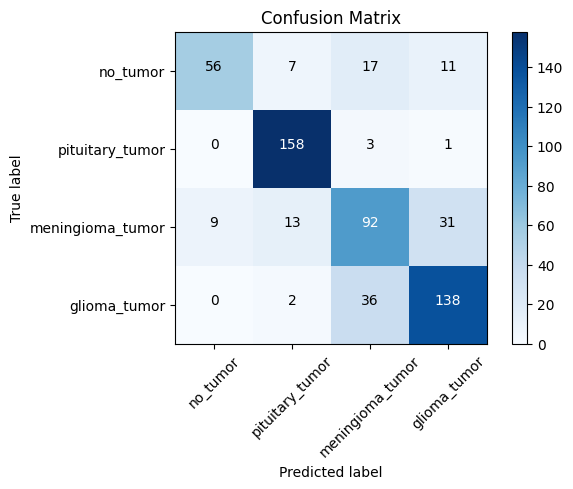

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming ytest contains your actual test labels
y_true = ytest

pred1 = lg.predict(xtest)  # Assuming lg is your trained model and xtest is your test data

# Calculate the confusion matrix
cm = confusion_matrix(y_true, pred1)

# Plotting the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes.keys(), rotation=45)
plt.yticks(tick_marks, classes.keys())

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Prediction**

In [ ]:
pred = sv.predict(xtest)

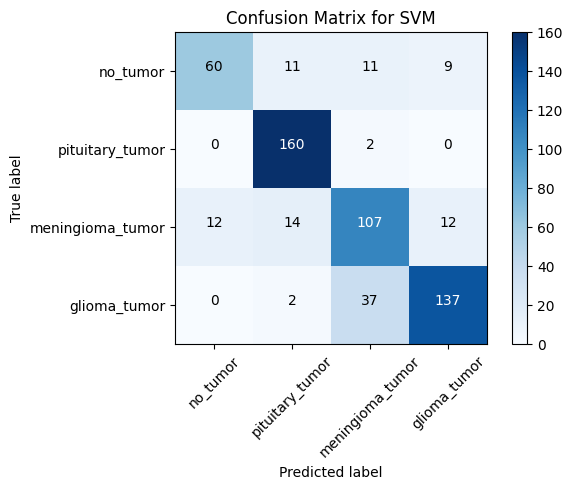

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming ytest contains your actual test labels
y_true = ytest

# Predict using your SVM model
pred = sv.predict(xtest)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, pred)

# Plotting the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes.keys(), rotation=45)
plt.yticks(tick_marks, classes.keys())

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

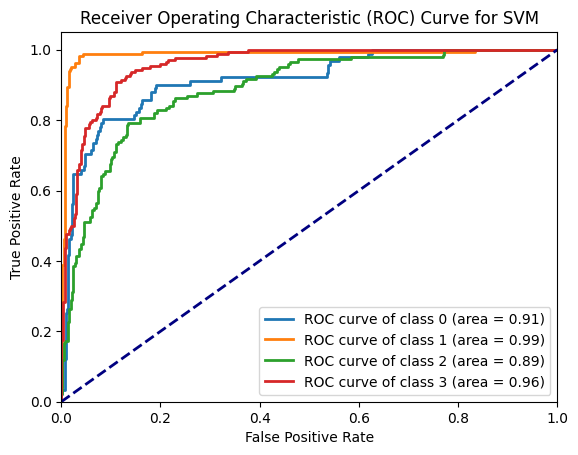

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming ytest contains your actual test labels and sv is your trained SVM model
y_true = label_binarize(ytest, classes=np.unique(ytest))  # Binarize the labels
y_scores = sv.decision_function(xtest)  # Get decision function values
n_classes = y_true.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.show()

In [ ]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  0,   8,   9,  15,  17,  19,  21,  25,  32,  42,  45,  46,  51,
         55,  70,  78,  82,  85,  90,  96,  98, 101, 106, 108, 111, 113,
        118, 122, 124, 125, 129, 135, 136, 141, 152, 154, 180, 181, 185,
        186, 192, 195, 198, 199, 203, 204, 215, 233, 239, 252, 257, 264,
        271, 274, 279, 284, 286, 297, 302, 306, 323, 327, 328, 334, 339,
        342, 348, 349, 352, 353, 356, 358, 364, 383, 390, 392, 401, 402,
        405, 425, 427, 434, 437, 442, 446, 449, 451, 458, 459, 460, 469,
        477, 483, 498, 503, 510, 513, 514, 520, 524, 531, 534, 540, 547,
        548, 552, 553, 563, 568, 571]),)

In [ ]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  110
3 3


**Test Model**

In [ ]:
dec = {0:'No Tumor', 1:'pituitary_tumor', 2:'meningioma_tumor', 3:'glioma_tumor'}

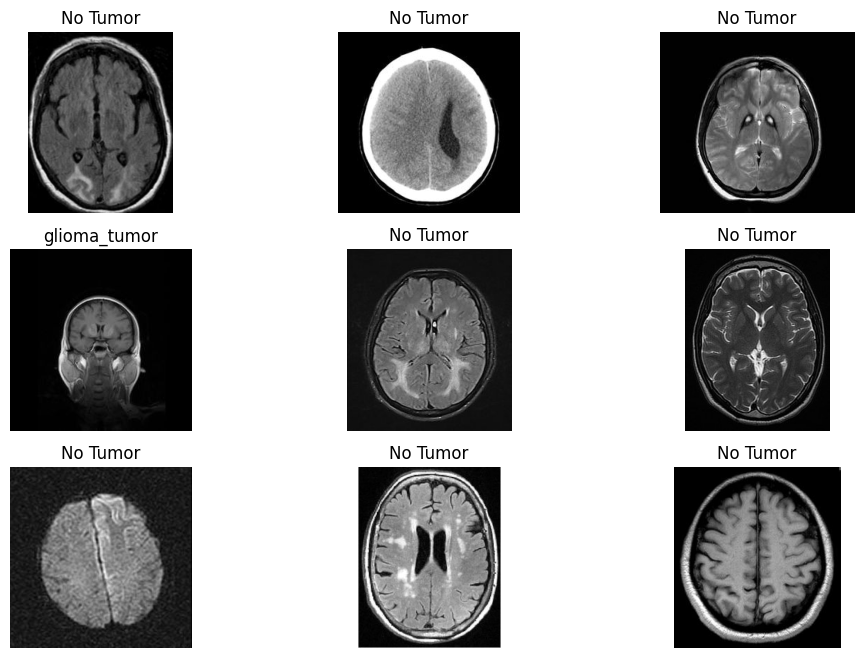

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
# Assuming 'sv' and 'dec' are defined and available in your environment

plt.figure(figsize=(12,8))

# Update the path based on the dataset structure:
dataset_base_path = "/root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2/" #adjust this base path based on how it mounted
image_folder = os.path.join(dataset_base_path,"Testing", "no_tumor") #assuming under 'Testing' there's 'no_tumor' folder

c=1
# Iterate through images in the folder:
for i in os.listdir(image_folder)[:9]:
    plt.subplot(3,3,c)

    # Construct the full image path using os.path.join:
    img_path = os.path.join(image_folder, i) #using full path in cv2.imread
    img = cv2.imread(img_path,0)

    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

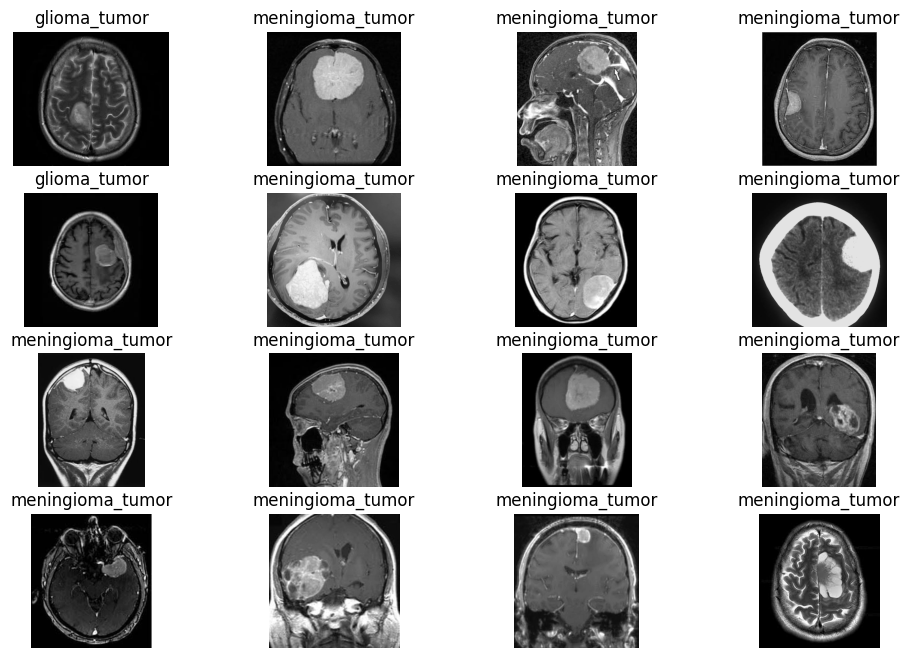

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Assuming 'sv' and 'dec' are defined and available in your environment

plt.figure(figsize=(12,8))

# Update the path to the 'meningioma_tumor' folder:
dataset_base_path = "/root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2/" #adjust this base path based on how it mounted
image_folder = os.path.join(dataset_base_path,"Testing", "meningioma_tumor") #assuming under 'Testing' there's 'no_tumor' folder


c=1
for i in os.listdir(image_folder)[:16]:
    plt.subplot(4,4,c)

    # Construct the full image path:
    img_path = os.path.join(image_folder, i)
    img = cv2.imread(img_path,0)

    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

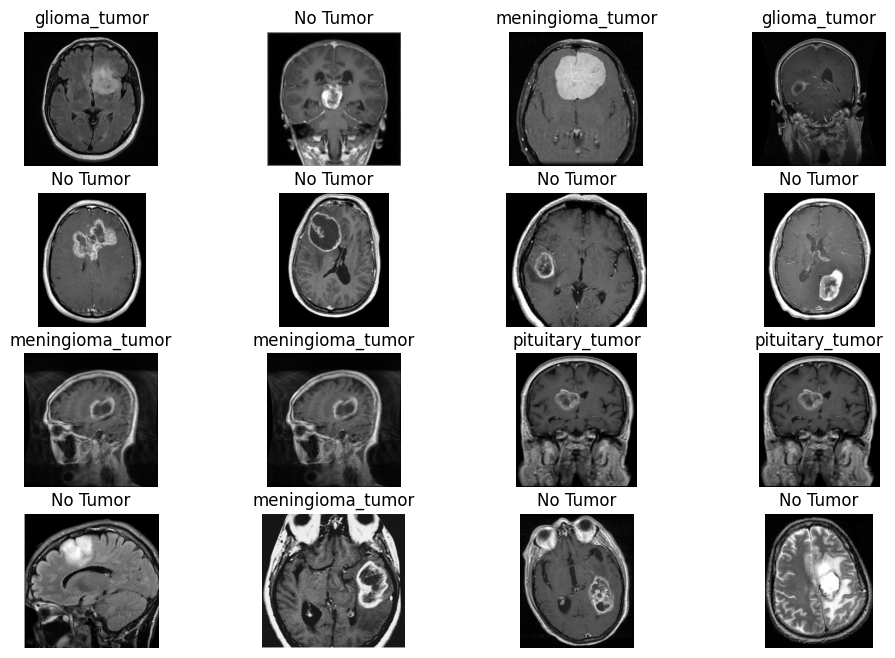

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Assuming 'sv' and 'dec' are defined and available in your environment

plt.figure(figsize=(12,8))

# Update the path to the 'meningioma_tumor' folder:
dataset_base_path = "/root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2/" #adjust this base path based on how it mounted
image_folder = os.path.join(dataset_base_path,"Testing", "glioma_tumor") #assuming under 'Testing' there's 'no_tumor' folder


c=1
for i in os.listdir(image_folder)[:16]:
    plt.subplot(4,4,c)

    # Construct the full image path:
    img_path = os.path.join(image_folder, i)
    img = cv2.imread(img_path,0)

    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [ ]:
## CNN Model

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [ ]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

# Load and preprocess training data
for i in labels:
    folderPath = os.path.join('/root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

# Load and preprocess testing data (append to training data)
for i in labels:
    folderPath = os.path.join('/root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

# Convert lists to NumPy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)

# Shuffle the data
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

# Reshape data for StandardScaler
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Now you can proceed with your model training
# ...

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

**Convolutional Neural Network**

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
import numpy as np

# Reshape X_train before the first call to model.fit
X_train = X_train.reshape(-1, 150, 150, 3)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 38s 264ms/step - accuracy: 0.2838 - loss: 1.3929 - val_accuracy: 0.3776 - val_loss: 1.3122
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.5001 - loss: 1.1279 - val_accuracy: 0.6497 - val_loss: 0.9181
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.6929 - loss: 0.8194 - val_accuracy: 0.7075 - val_loss: 0.7382
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.7290 - loss: 0.6977 - val_accuracy: 0.7585 - val_loss: 0.6300
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.8017 - loss: 0.5317 - val_accuracy: 0.8333 - val_loss: 0.4940
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.8287 - loss: 0.4830 - val_accuracy: 0.8129 - val_loss: 0.4720
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.8730 - loss: 0.3708 - val_accuracy: 0.8197 - val_loss: 0.4067
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - accuracy: 0.8857 - loss: 0.3207 - val_accuracy: 0.78

In [ ]:
import numpy as np

# Reshape X_train before training (as you've done)
X_train = X_train.reshape(-1, 150, 150, 3)

# ... your model compilation and training code ...

# Reshape X_test to match X_train's shape before evaluation
X_test = X_test.reshape(-1, 150, 150, 3)  # This is the crucial line

# Now evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.9575 - loss: 0.2709
0.9571865200996399


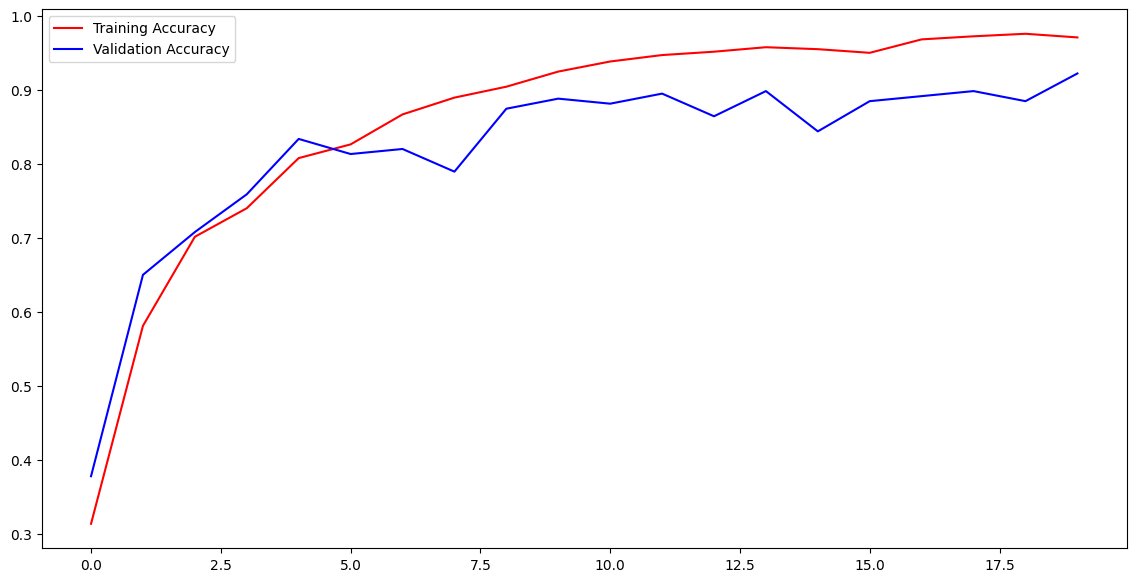

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

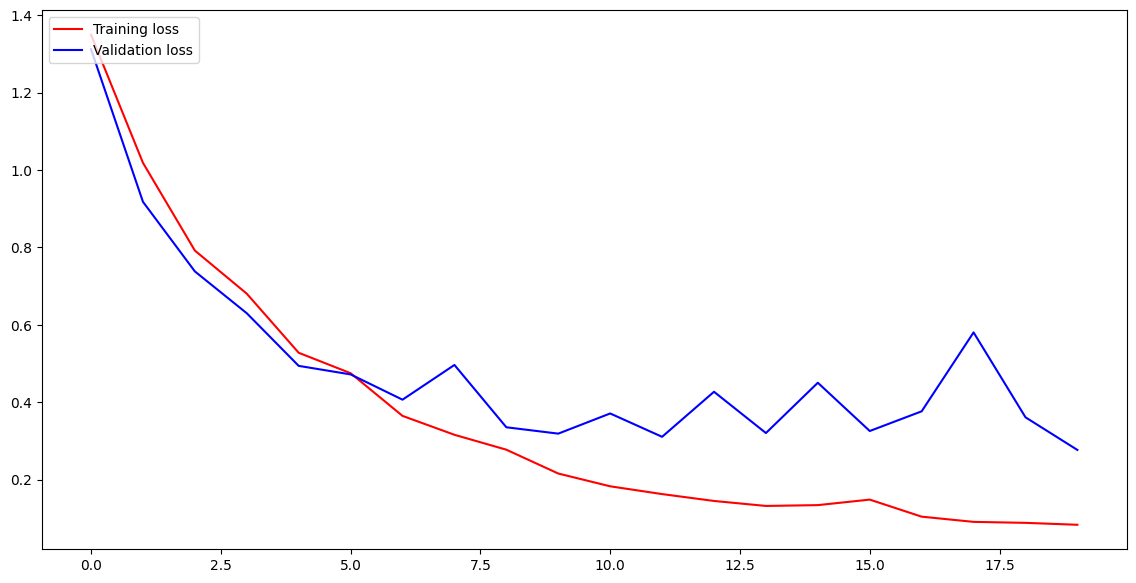

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


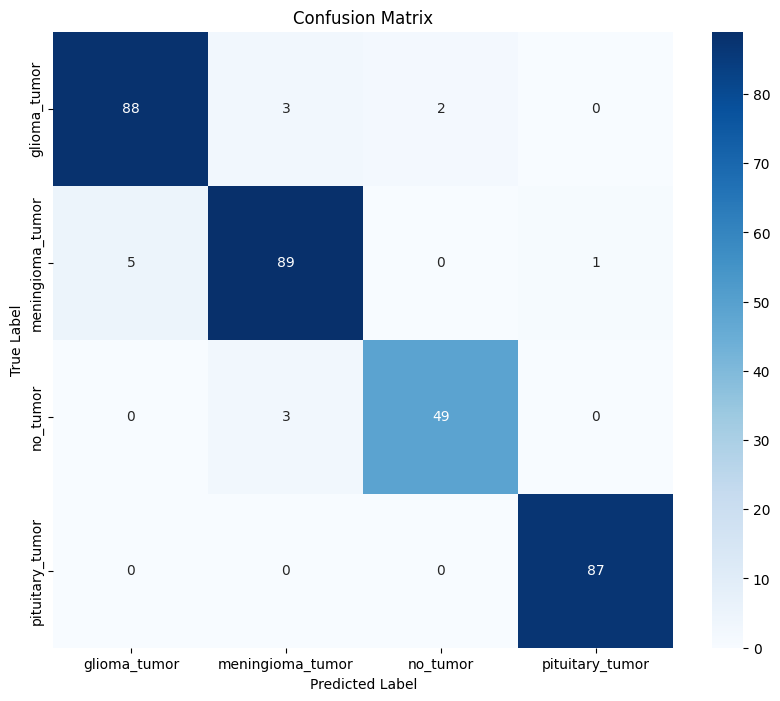

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained your model and it's called 'model'
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted classes
y_true_classes = np.argmax(y_test, axis=1)  # Get true classes

# Calculate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes) #This line is added to create the confusion matrix.

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


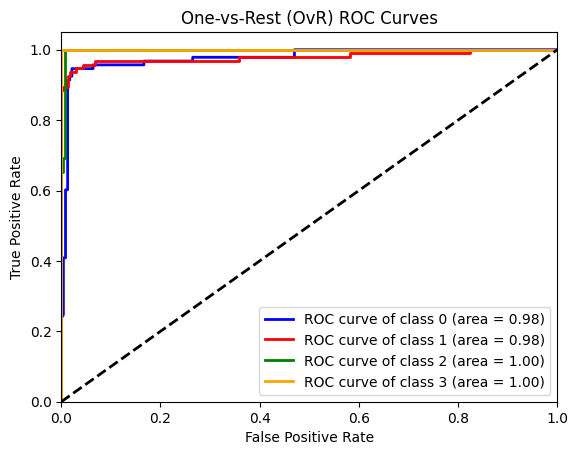

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming you have y_test_new (true labels) and y_scores (predicted probabilities)
y_true = label_binarize(y_test_new, classes=[0, 1, 2, 3])  # Binarize labels
y_scores = model.predict(X_test)  # Get predicted probabilities for each class
n_classes = y_true.shape[1]  # Number of classes

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
lw = 2  # Line width
colors = ['blue', 'red', 'green', 'orange']  # Colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest (OvR) ROC Curves')
plt.legend(loc="lower right")
plt.show()

In [ ]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

95.52% Confidence This Is tumor


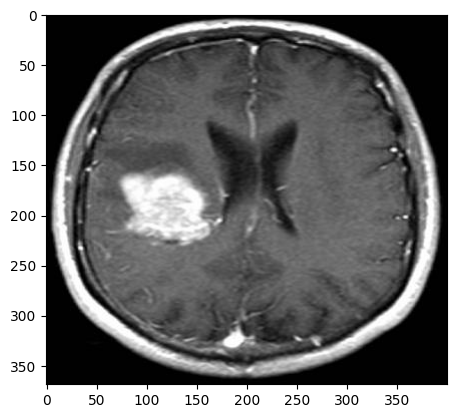

In [ ]:
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation
from tensorflow.keras import regularizers  # For regularization



# Define class_names as a dictionary (original)
class_names_original = {0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}

# Define new class_names for tumor/no_tumor
class_names = {0: 'tumor', 1: 'no_tumor'}

# Load and preprocess the image
img = Image.open(r"/content/Y11.jpg").convert('RGB')  # Convert to RGB format
x = np.array(img.resize((150, 150)))  # Resize to match model input shape
x = x.reshape(1, 150, 150, 3)  # Reshape for batch and color channels

# Preprocess image: Normalize pixel values to [0, 1]
x = x / 255.0

# Make the prediction and get probabilities for all classes
res = model.predict_on_batch(x)
probabilities = res[0]

# Combine probabilities for tumor classes (0, 1, 3)
tumor_probability = probabilities[0] + probabilities[1] + probabilities[3]
no_tumor_probability = probabilities[2]

# Create new probabilities array for tumor/no_tumor
new_probabilities = [tumor_probability, no_tumor_probability]

# Get the predicted class index
classification = np.argmax(new_probabilities)

# Display the image
imshow(img)

# Get the predicted class name and print the result
predicted_class_name = class_names[classification]
print(f"{new_probabilities[classification] * 100:.2f}% Confidence This Is {predicted_class_name}")


89.30% Confidence This Is no_tumor


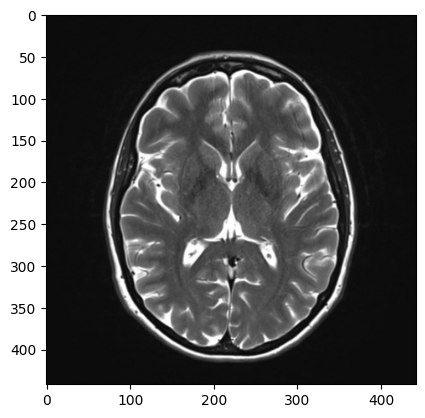

In [ ]:
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation
from tensorflow.keras import regularizers  # For regularization


# Assuming 'model' is your trained Keras model
# ... (Your model loading or definition code here) ...

# Define class_names as a dictionary (original)
class_names_original = {0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}

# Define new class_names for tumor/no_tumor
class_names = {0: 'tumor', 1: 'no_tumor'}

# Load and preprocess the image
img = Image.open(r"/content/No21.jpg").convert('RGB')  # Convert to RGB format
x = np.array(img.resize((150, 150)))  # Resize to match model input shape
x = x.reshape(1, 150, 150, 3)  # Reshape for batch and color channels

# Preprocess image: Normalize pixel values to [0, 1]
x = x / 255.0

# Make the prediction and get probabilities for all classes
res = model.predict_on_batch(x)
probabilities = res[0]

# Combine probabilities for tumor classes (0, 1, 3)
tumor_probability = probabilities[0] + probabilities[1] + probabilities[3]
no_tumor_probability = probabilities[2]

# Create new probabilities array for tumor/no_tumor
new_probabilities = [tumor_probability, no_tumor_probability]

# Get the predicted class index
classification = np.argmax(new_probabilities)

# Display the image
imshow(img)

# Get the predicted class name and print the result
predicted_class_name = class_names[classification]
print(f"{new_probabilities[classification] * 100:.2f}% Confidence This Is {predicted_class_name}")

59.20% Confidence This Is tumor


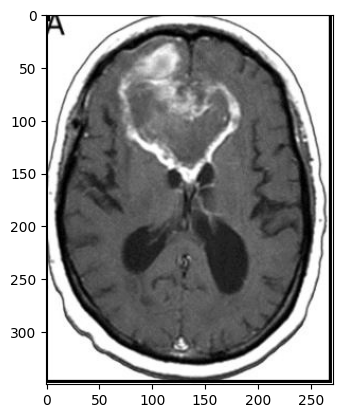

In [ ]:
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation
from tensorflow.keras import regularizers  # For regularization



# Define class_names as a dictionary (original)
class_names_original = {0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}

# Define new class_names for tumor/no_tumor
class_names = {0: 'tumor', 1: 'no_tumor'}

# Load and preprocess the image
img = Image.open(r"/content/Y167.JPG").convert('RGB')  # Convert to RGB format
x = np.array(img.resize((150, 150)))  # Resize to match model input shape
x = x.reshape(1, 150, 150, 3)  # Reshape for batch and color channels

# Preprocess image: Normalize pixel values to [0, 1]
x = x / 255.0

# Make the prediction and get probabilities for all classes
res = model.predict_on_batch(x)
probabilities = res[0]

# Combine probabilities for tumor classes (0, 1, 3)
tumor_probability = probabilities[0] + probabilities[1] + probabilities[3]
no_tumor_probability = probabilities[2]

# Create new probabilities array for tumor/no_tumor
new_probabilities = [tumor_probability, no_tumor_probability]

# Get the predicted class index
classification = np.argmax(new_probabilities)

# Display the image
imshow(img)

# Get the predicted class name and print the result
predicted_class_name = class_names[classification]
print(f"{new_probabilities[classification] * 100:.2f}% Confidence This Is {predicted_class_name}")


75.57% Confidence This Is tumor


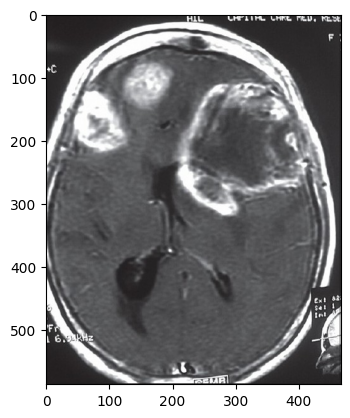

In [ ]:
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation
from tensorflow.keras import regularizers  # For regularization



# Define class_names as a dictionary (original)
class_names_original = {0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}

# Define new class_names for tumor/no_tumor
class_names = {0: 'tumor', 1: 'no_tumor'}

# Load and preprocess the image
img = Image.open(r"/content/Y180.jpg").convert('RGB')  # Convert to RGB format
x = np.array(img.resize((150, 150)))  # Resize to match model input shape
x = x.reshape(1, 150, 150, 3)  # Reshape for batch and color channels

# Preprocess image: Normalize pixel values to [0, 1]
x = x / 255.0

# Make the prediction and get probabilities for all classes
res = model.predict_on_batch(x)
probabilities = res[0]

# Combine probabilities for tumor classes (0, 1, 3)
tumor_probability = probabilities[0] + probabilities[1] + probabilities[3]
no_tumor_probability = probabilities[2]

# Create new probabilities array for tumor/no_tumor
new_probabilities = [tumor_probability, no_tumor_probability]

# Get the predicted class index
classification = np.argmax(new_probabilities)

# Display the image
imshow(img)

# Get the predicted class name and print the result
predicted_class_name = class_names[classification]
print(f"{new_probabilities[classification] * 100:.2f}% Confidence This Is {predicted_class_name}")


In [7]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [8]:
#@title Provide a title for your app:
heading_title = "Brain tumor classification app" # @param {type:"string"}

In [9]:
#@title You can add some example images that you want to be present in your app by default. The user can see use these images to quickly and easily test the model. How many example images do you want to load?
num_examples = 2 # @param {type:"slider", min:1, max:6, step:1}

example_path_1:  /content/Y4.jpg
example_path_2:  /content/No21.jpg


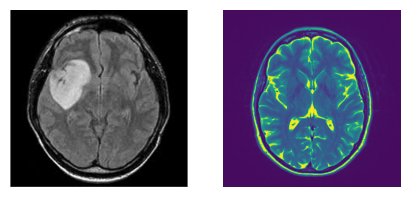

In [10]:
#@title Enter the paths for the example images that you want displayed in your app by default. The user can use these images to quickly and easily test the model. Note: You can get the path for the file from the left sidebar. Simply run the code below, select the image file you want to include from its folder, right-click and select 'Copy path'. Then paste the path in the input box displayed:
from matplotlib import pyplot as plt
from PIL import Image

examples=[]
for i in range(num_examples):
  example_path = input(f"example_path_{i+1}:  ")
  examples.append(example_path)

#Displaying the selected images side by side
rows = 1
plt.figure(figsize=(16, 8))
for num, x in enumerate(examples):
    img = Image.open(x)
    plt.subplot(rows,6,num+1)
   # plt.title(x.split('.')[0])
    plt.axis('off')
    plt.imshow(img)


In [5]:
#@title You can also add some description and explanation to your app's interace if you want. Go ahead and specify some text for the description and the long description (if you want to):
desc = "Brain tumor app. Let's learn!" # @param {type:"string"}
long_desc = "Select an image or upload one to predict if brain tumor is present or not" # @param {type:"string"}

In [11]:
import gradio as gr

#@title Select a Theme for Gradio Interface:
theme_selection = "Glass" # @param ["Base", "Default", "Glass", "Monochrome", "Soft"]

theme_dict = {
    "Base": gr.themes.Base(),
    "Default": gr.themes.Default(),
    "Glass": gr.themes.Glass(),
    "Monochrome": gr.themes.Monochrome(),
    "Soft": gr.themes.Soft()
}

# The selected theme is determined by the user's dropdown selection
selected_theme = theme_dict[theme_selection]

# Now you can use the selected_theme variable when you create your Gradio interface

In [12]:
def recognize_image(image):
    # Resize the image to the expected dimensions
    img = Image.fromarray(image).resize((128, 128))
    # Convert the image to a NumPy array
    x = np.array(img)
    # Reshape the image to match the model input
    x = x.reshape(1, 150, 150, 3)

    # Make a prediction
    res = model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]

    # Map the class index to the actual class name (assuming you have a list of class names)
    class_names = ['No Tumor', 'Tumor']  # Example class names, update according to your model
    result = f"{names(classification)}"

    return result

In [13]:
# Assuming recognize_image, examples, heading_title, desc, long_desc, and selected_theme are defined elsewhere.

# Update the import for components
image = gr.Image()
label = gr.Label()

# Create the interface with the updated component imports
iface = gr.Interface(
    fn=recognize_image,
    inputs=image,
    outputs=label,
    examples=examples,
    title=heading_title,
    description=desc,
    article=long_desc,
    theme=selected_theme  # Make sure this is defined based on user selection as explained in previous messages
)

iface.launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://0006b271292aac79c6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 624, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 323, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 2016, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1563, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 8

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://0006b271292aac79c6.gradio.live


In [14]:
!pip install --upgrade gradio

Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_install.py", line 40, in <module>
    from pip._internal.operations.install.wheel import install_wheel
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/operations/install/wheel.py", line 40, in <module>
    from pip._vendor.distlib.scripts import ScriptMaker
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/distlib/scripts.py", line 17, in <module>
    from .resources import finder
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/distlib/resources.py", line 19, in <module>
    from .util import cached_property, get_cache_base, Cache
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/distlib/util.py", line 900, in <module>
 

In [15]:
def recognize_image(image):
    try:
        # Preprocess image
        processed_image = preprocess_image(image)
        # Print model input shape
        print("Model Input Shape:", processed_image.shape)
        # Get predictions
        predictions = model.predict(processed_image)
        # Return results
        return predictions.tolist()
    except Exception as e:
        print(f"Error: {str(e)}")
        return f"Error: {str(e)}"  # Propagate the error to Gradio

In [16]:
# Assuming recognize_image, examples, heading_title, desc, long_desc, and selected_theme are defined elsewhere.

# Update the import for components
image = gr.Image()
label = gr.Label()

# Create the interface with the updated component imports
iface = gr.Interface(
    fn=recognize_image,
    inputs=image,
    outputs=label,
    examples=examples,
    title=heading_title,
    description=desc,
    article=long_desc,
    theme=selected_theme  # Make sure this is defined based on user selection as explained in previous messages
)

iface.launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://d0e647a8ea354cd9da.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Error: name 'preprocess_image' is not defined
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://d0e647a8ea354cd9da.gradio.live


In [21]:
import numpy as np
def preprocess_image(image):
    """Preprocesses an image for the model."""
    # Resize the image
    img = Image.fromarray(image).resize((150, 150))  # Resize to your model's input size
    # Convert to NumPy array
    x = np.array(img)
    # Reshape for model input
    x = x.reshape(1, 150, 150, 3)  # Reshape to (batch_size, height, width, channels)
    # Normalize pixel values
    x = x / 255.0  # Normalize to [0, 1]
    return x

In [22]:
import numpy as np
def recognize_image(image):
    try:
        # Preprocess image
        processed_image = preprocess_image(image)
        # Print model input shape
        print("Model Input Shape:", processed_image.shape)
        # Get predictions
        predictions = model.predict(processed_image)
        # Return results
        return predictions.tolist()  # Convert prediction into human-readable format
    except Exception as e:
        print(f"Error: {str(e)}")
        return f"Error: {str(e)}"  # Propagate the error to Gradio

In [ ]:
# Update the import for components
image = gr.Image()
label = gr.Label()

# Create the interface with the updated component imports
iface = gr.Interface(
    fn=recognize_image,
    inputs=image,
    outputs=label,
    examples=examples,
    title=heading_title,
    description=desc,
    article=long_desc,
    theme=selected_theme  # Make sure this is defined based on user selection as explained in previous messages
)

iface.launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://f6c533f46654e1d1da.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Model Input Shape: (1, 150, 150, 3)
Error: name 'model' is not defined
